In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pathresults = "../../results/"
#pathresults = "/DUMUXDune27/DUMUX/dumux-rosi/python/paperSc/results/"
data_file_delimiter = ","
import plotnine

from plotnine import *

# get param set
paramsets =  pd.read_csv('../../output_random_rows.csv')
paramsets = paramsets.drop(paramsets.columns.tolist()[-1],axis=1)
outputvalsname =  ['wat','cs']
column_names = outputvalsname + paramsets.columns.tolist()
paramsets.drop('theta',inplace=True, axis=1)

df = pd.read_pickle("./pset99_allcell.pkl")  # cid, pSet, rr, 1 or 9


nKonz = 9
volIdx=nKonz+1
lenIdx=volIdx+1
stIdx=lenIdx+1
orgIdId=stIdx+1
relLenId=orgIdId+1
coordId = relLenId+1
segIdxid = coordId+1

nToGet = coordId#elements + 3d coordinates of y , node+vol+len+st 
selectedsets = [7, 21, 47, 85]

In [15]:
df.shape

(17, 99)

In [16]:
konzcs = df.loc[1]# pSet, rr, 9


vols = df.loc[volIdx]# pSet, rr, 9
lens = df.loc[lenIdx]# pSet, rr, 1
orgIds = df.loc[orgIdId]# pSet, rr, 1
reLens =  df.loc[relLenId]
coords =  df.loc[coordId]
segIdx =  df.loc[segIdxid]
sts = df.loc[stIdx]

In [26]:
dfnew = pd.DataFrame(columns=['locCylId','coords','vols','lens','reLens','pSet'])

for pSet in selectedsets:
    
    cyltr = len(orgIds.loc[pSet])# 21 or 22
    locCylId = np.array([np.full(9,ii) for ii in range(cyltr)])
    locCellId = np.full((cyltr,9),np.array([i for i in range(9)]))
    
    myData = pd.DataFrame({'locCylId':locCylId.reshape(-1)})
    
    myData['locCellId']= locCellId.reshape(-1)
    myData['coords']= coords.loc[pSet].reshape(-1)
    
    myData['wat']=  df.loc[0].loc[pSet].reshape(-1)
    myData['cs']=  df.loc[1].loc[pSet].reshape(-1)
    myData['cl']=  df.loc[2].loc[pSet].reshape(-1)
    myData['coa']=  df.loc[3].loc[pSet].reshape(-1)
    myData['cod']=  df.loc[4].loc[pSet].reshape(-1)
    myData['cca']=  df.loc[5].loc[pSet].reshape(-1)
    myData['ccd']=  df.loc[6].loc[pSet].reshape(-1)
    myData['css2']= df.loc[7].loc[pSet].reshape(-1)
    myData['co2']= df.loc[8].loc[pSet].reshape(-1)
    
    myData['vols']= vols.loc[pSet].reshape(-1)
    
    lens__ = lens.loc[pSet]
    lens_ = np.array([np.full(9, ll) for ll in lens__])
    reLens__ = reLens.loc[pSet]
    reLens_ = np.array([np.full(9, ll) for ll in reLens__])
    myData['lens']= lens_.reshape(-1)
    myData['reLens']= reLens_.reshape(-1)
    
    sts__ = sts.loc[pSet]
    sts_ = np.array([np.full(9, ll) for ll in sts__])
    segIdx__ = segIdx.loc[pSet]
    segIdx_ = np.array([np.full(9, ll) for ll in segIdx__])
    myData['sts']= sts_.reshape(-1)
    myData['segIdx']= segIdx_.reshape(-1)
    
    myData['pSet'] = pSet
    
    dfnew = pd.concat([dfnew, myData], ignore_index=True)

In [27]:
dfnew['pSet'].unique()

array([7, 21, 47, 85], dtype=object)

set inner and outer radious from root center

In [28]:
dfnew['rIn'] = -1
dfnew['rOut'] = -1

dfnew.loc[((dfnew['sts']==0))&((dfnew['locCellId']==0)),'rIn']=0.05
dfnew.loc[((dfnew['sts']==3))&((dfnew['locCellId']==0)),'rIn']=0.05
dfnew.loc[((dfnew['sts']==1))&((dfnew['locCellId']==0)),'rIn']=0.02
dfnew.loc[((dfnew['sts']==2))&((dfnew['locCellId']==0)),'rIn']=0.02

dfnew.loc[((dfnew['locCellId']==0)),'rOut'] = (dfnew.loc[((dfnew['locCellId']==0)),'coords']
                                               - dfnew.loc[((dfnew['locCellId']==0)),'rIn'])*2+dfnew.loc[((dfnew['locCellId']==0)),'rIn']


for cellid in range(1,9):
    dfnew.loc[((dfnew['locCellId']==cellid)),'rIn'] =np.array(list(dfnew.loc[((dfnew['locCellId']==cellid-1)),'rOut']))
    dfnew.loc[((dfnew['locCellId']==cellid)),'rOut'] = (dfnew.loc[((dfnew['locCellId']==cellid)),'coords']
                                               - dfnew.loc[((dfnew['locCellId']==cellid)),'rIn'])*2+dfnew.loc[((dfnew['locCellId']==cellid)),'rIn']

In [29]:
dfnew['rIn2'] = -1
dfnew['rOut2'] = -1
dfnew['coords2'] =np.nan

dfnew.loc[((dfnew['locCellId']==0)),'rIn2']=0.

dfnew.loc[((dfnew['locCellId']==0)),'rOut2'] = (dfnew.loc[((dfnew['locCellId']==0)),'coords']
                                               - dfnew.loc[((dfnew['locCellId']==0)),'rIn'])*2+dfnew.loc[((dfnew['locCellId']==0)),'rIn2']

dfnew.loc[((dfnew['locCellId']==0)),'coords2']=(dfnew.loc[((dfnew['locCellId']==0)),'rIn2'] +
                                                           dfnew.loc[((dfnew['locCellId']==0)),'rOut2'])/2

for cellid in range(1,9):
    dfnew.loc[((dfnew['locCellId']==cellid)),'rIn2'] =np.array(list(dfnew.loc[((dfnew['locCellId']==cellid-1)),'rOut2']))
    dfnew.loc[((dfnew['locCellId']==cellid)),'rOut2'] = (dfnew.loc[((dfnew['locCellId']==cellid)),'coords']
                                               - dfnew.loc[((dfnew['locCellId']==cellid)),'rIn'])*2+dfnew.loc[((dfnew['locCellId']==cellid)),'rIn2']
    dfnew.loc[((dfnew['locCellId']==cellid)),'coords2'] = (dfnew.loc[((dfnew['locCellId']==cellid)),'rIn2'] +
                                                           dfnew.loc[((dfnew['locCellId']==cellid)),'rOut2'])/2

In [30]:
dfnew.head()#n=30)

,locCylId,coords,vols,lens,reLens,pSet,locCellId,wat,cs,cl,...,ccd,css2,co2,sts,segIdx,rIn,rOut,rIn2,rOut2,coords2
0,0,0.054990,0.003448,1.0,1.0,7,0.0,0.000742,4.927627e-07,0.000684,...,0.000009,0.000011,4.982442e-07,0.0,0.0,0.050000,0.059980,0.000000,0.009980,0.004990
1,0,0.065966,0.004962,1.0,1.0,7,1.0,0.001068,4.911763e-07,0.000684,...,0.000009,0.000011,4.980345e-07,0.0,0.0,0.059980,0.071952,0.009980,0.021952,0.015966
2,0,0.079133,0.007141,1.0,1.0,7,2.0,0.001537,4.903216e-07,0.000684,...,0.000009,0.000011,4.979513e-07,0.0,0.0,0.071952,0.086314,0.021952,0.036314,0.029133
3,0,0.094928,0.010276,1.0,1.0,7,3.0,0.002212,4.900068e-07,0.000684,...,0.000009,0.000011,4.979218e-07,0.0,0.0,0.086314,0.103542,0.036314,0.053542,0.044928
4,0,0.113876,0.014788,1.0,1.0,7,4.0,0.003183,4.899153e-07,0.000684,...,0.000009,0.000011,4.979125e-07,0.0,0.0,0.103542,0.124210,0.053542,0.074210,0.063876


In [21]:
print(max(dfnew.loc[((dfnew['locCellId']==0)),'rIn']), min(dfnew.loc[((dfnew['locCellId']==8)),'rOut']))
print(max(dfnew.loc[((dfnew['locCellId']==0)),'rIn2']), 
      min(dfnew.loc[((dfnew['locCellId']==8)),'rOut2']), 
      max(dfnew.loc[((dfnew['locCellId']==8)),'rOut2']))
print(max(dfnew.loc[((dfnew['locCellId']==0)),'coords2']), 
      min(dfnew.loc[((dfnew['locCellId']==8)),'coords2']), 
      max(dfnew.loc[((dfnew['locCellId']==8)),'coords2']))
# perirhizal always bigger than theoreticall rhizosphere (3mm)

0.05 0.10029389128129715
0.0 0.08029389128129716 0.5445439630212967
0.00773921154585816 0.0720687091008346 0.45702422259471265


In [32]:
dfnew.to_pickle('./dfselected.pkl')

In [31]:
dfnew['pSet'].unique()

array([7, 21, 47, 85], dtype=object)

In [ ]:
# redefine vale in rhizosphere

In [3]:
#dfnew =  pd.read_pickle("./dfselected.pkl") 
dfnew =  pd.read_pickle("./dfperrhizal_allcell.pkl") 
selectedsets = [5,44,49,61]
dfnew = dfnew[[pp in selectedsets for pp in dfnew['pSet']]]

In [4]:
dfnew['pSet'].unique()

array([5, 44, 49, 61], dtype=object)

In [ ]:
# get gradients at root tips

In [46]:
dfnew

,locCylId,coords,vols,lens,reLens,pSet,locCellId,wat,cs,cl,...,ccd,css2,co2,sts,segIdx,rIn,rOut,rIn2,rOut2,coords2
0,0,0.054990,0.003448,1.000000,1.000000,7,0.0,0.000742,4.927627e-07,0.000684,...,0.000009,0.000011,4.982442e-07,0.0,0.0,0.050000,0.059980,0.000000,0.009980,0.004990
1,0,0.065966,0.004962,1.000000,1.000000,7,1.0,0.001068,4.911763e-07,0.000684,...,0.000009,0.000011,4.980345e-07,0.0,0.0,0.059980,0.071952,0.009980,0.021952,0.015966
2,0,0.079133,0.007141,1.000000,1.000000,7,2.0,0.001537,4.903216e-07,0.000684,...,0.000009,0.000011,4.979513e-07,0.0,0.0,0.071952,0.086314,0.021952,0.036314,0.029133
3,0,0.094928,0.010276,1.000000,1.000000,7,3.0,0.002212,4.900068e-07,0.000684,...,0.000009,0.000011,4.979218e-07,0.0,0.0,0.086314,0.103542,0.036314,0.053542,0.044928
4,0,0.113876,0.014788,1.000000,1.000000,7,4.0,0.003183,4.899153e-07,0.000684,...,0.000009,0.000011,4.979125e-07,0.0,0.0,0.103542,0.124210,0.053542,0.074210,0.063876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18076,548,0.076006,0.010642,1.003479,2.006871,85,4.0,0.002284,8.189751e-06,0.000750,...,0.000009,0.000183,4.767748e-06,2.0,548.0,0.064902,0.087110,0.044902,0.067110,0.056006
18077,548,0.102013,0.019171,1.003479,2.006871,85,5.0,0.004114,8.189799e-06,0.000750,...,0.000009,0.000183,4.767748e-06,2.0,548.0,0.087110,0.116916,0.067110,0.096916,0.082013
18078,548,0.136919,0.034535,1.003479,2.006871,85,6.0,0.007410,8.189839e-06,0.000750,...,0.000009,0.000183,4.767748e-06,2.0,548.0,0.116916,0.156921,0.096916,0.136921,0.116919
18079,548,0.183768,0.062213,1.003479,2.006871,85,7.0,0.013349,8.189866e-06,0.000750,...,0.000009,0.000183,4.767748e-06,2.0,548.0,0.156921,0.210615,0.136921,0.190615,0.163768


In [39]:
min(dfnew.loc[((dfnew['locCellId']==8)),'rOut2'])

0.08029389128129716

In [5]:
# Function to calculate the solute content for each domain up to r1
def calculate_solute_content(group, r1, namekonz):
    # Sort the group by face_start to ensure correct order
    group = group.sort_values(by='rIn2')
    
    total_volume = np.sum(group['vols'] )
    
    # Calculate the total solute content in the entire domain
    total_solute_content = np.sum(group[namekonz]* group['vols'])
    
    # Determine if r1 is within the domain or beyond its outer boundary
    outer_face_end = group['rOut2'].max()
    totvol = 0
    if r1 >= outer_face_end:
        # r1 is beyond the outer boundary, so use the total solute content
        solute_content = total_solute_content
        partial_volume = total_volume
    else:
        # r1 is within the domain, calculate solute content up to r1
        mask = group['rOut2'] <= r1
        if np.any(mask):
            relevant_volumes = group['vols'][mask]
            relevant_concentrations = group[namekonz][mask]
            solute_content = np.sum(relevant_concentrations * relevant_volumes)
            partial_volume = np.sum(relevant_volumes)
            # Calculate contribution of the partially included cell at r1
            partial_start = group.loc[group['rOut2'] > r1, 'rIn'].values[0]
            partial_start2 = group.loc[group['rOut2'] > r1, 'rIn2'].values[0]
            # for vol computation  see ditance needed to add to go from rel to actual radius
            partial_start_diff = group.loc[group['rOut2'] > r1, 'rIn'].values[0]-group.loc[group['rOut2'] > r1, 'rIn2'].values[0]
            partial_length = group.loc[group['rOut2'] > r1, 'lens'].values[0]
            partial_volume_ = ((r1+partial_start_diff)**2 - partial_start**2) * partial_length * np.pi
            partial_volume += partial_volume_
            
            partial_concentration = np.interp((r1+partial_start2)/2, group['coords2'], group[namekonz])
            solute_content += partial_concentration * partial_volume_
        else:
            solute_content = 0.0
    
    return pd.Series({
        #'cylId': group['locCylId'].iloc[0],
        'partialQ_'+namekonz: solute_content,
        'partial_volume': partial_volume,
        'st': group['sts'].iloc[0],
        #'pSet': group['pSet'].iloc[0]
    })


In [6]:
#get everything per unit of osil
dfnew['theta']=dfnew['wat']/dfnew['vols']
dfnew['cssoil']=dfnew['cs']*dfnew['theta']
dfnew['clsoil']=dfnew['cl']*dfnew['theta']
# Create a list to store results for different concentration ranges
results = []
obsDis = 0.08
for namekonz_ in [ 'theta','cssoil','clsoil','coa','cod','cca','ccd','css2','co2']:
    print('namekonz_', namekonz_)
    result_df = dfnew.groupby(['locCylId','pSet']).apply(calculate_solute_content, r1=obsDis, namekonz=namekonz_).reset_index()
    results.append(result_df)


namekonz_ theta
namekonz_ cssoil
namekonz_ clsoil
namekonz_ coa
namekonz_ cod
namekonz_ cca
namekonz_ ccd
namekonz_ css2
namekonz_ co2


In [7]:
from functools import reduce
# Columns to merge on
merge_columns = ['locCylId',  'pSet','st', 'partial_volume']

# Merge the DataFrames
merged_df = reduce(lambda left, right: pd.merge(left, right, on=merge_columns), results)
#merged_df.to_pickle('./allcellupto08mm.pkl')

In [43]:
#merged_df

,locCylId,pSet,partialQ_theta,partial_volume,st,partialQ_cssoil,partialQ_clsoil,partialQ_coa,partialQ_cod,partialQ_cca,partialQ_ccd,partialQ_css2,partialQ_co2
0,0,7,0.009737,0.045239,0.0,4.774805e-09,0.000007,2.479131e-08,3.952974e-07,1.278536e-08,4.164419e-07,5.160109e-07,2.252715e-08
1,0,21,0.009771,0.045239,0.0,4.132021e-08,0.000006,3.582952e-08,3.847957e-07,2.097211e-08,4.471317e-07,4.421405e-06,2.927310e-06
2,0,47,0.009737,0.045239,0.0,4.043791e-09,0.000007,2.726626e-09,4.216226e-07,7.499149e-09,4.385775e-07,4.495045e-07,6.924648e-07
3,0,85,0.009735,0.045239,0.0,6.985550e-08,0.000007,3.689707e-08,3.839761e-07,2.018287e-08,4.168188e-07,7.291859e-06,1.586160e-07
4,1,7,0.006715,0.030159,1.0,3.288583e-09,0.000004,1.652623e-08,2.635329e-07,8.522640e-09,2.776276e-07,3.436042e-07,1.501628e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,544,85,0.006577,0.030159,1.0,6.842456e-08,0.000005,2.737166e-08,2.532725e-07,2.523069e-08,2.706549e-07,5.969035e-06,1.370297e-07
2005,545,85,0.009978,0.045239,3.0,1.805325e-07,0.000007,3.742825e-08,3.834449e-07,2.976025e-08,4.072803e-07,8.384752e-06,1.588817e-07
2006,546,85,0.006701,0.030159,1.0,8.494625e-08,0.000005,2.466205e-08,2.559200e-07,1.468043e-08,2.766505e-07,5.039812e-06,1.057200e-07
2007,547,85,0.006474,0.030262,2.0,5.172361e-08,0.000005,2.744940e-08,2.541623e-07,2.311944e-08,2.744266e-07,5.407823e-06,1.420219e-07


In [8]:


#outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
#column_names = outputvalsname + paramsets.columns.tolist()
def getnewval_cell(df):
    #outputvalsname =  ['wat','cs','cl','coa','cod','cca','ccd','css2','co2','yX','yY','yZ']
    #column_names = outputvalsname + paramsets.columns.tolist()
    for konzz in ['theta','coa','cod','cca','ccd','css2','co2']:
        df[konzz] = df['partialQ_'+konzz]/df['partial_volume']
    for konzz in ['cs','cl']:
        df[konzz] = df['partialQ_'+konzz+'soil']/df['partialQ_theta']#/df['partial_volume']
    df['vols'] = df['partial_volume']
    df['wat'] = df['partialQ_theta']
    try:
        df['css']=df['css2']
    except:
        pass
    df['cxd']=df['cod']+df['ccd']
    df['cxa']=df['coa']+df['cca']
    df['co'] = df['cod']+df['coa']
    df['cc'] = df['ccd']+df['cca']
    df['cx']=df['co']+df['cc']
    df['cxd_cx']=df['cxd']/df['cx']
    df['cxa_cx']=df['cxa']/df['cx']
    try:
        df['theta']=df['wat']/df['vols']
    except:
        try:
            df['theta']=df['wat']/df['vol']
        except:
            pass
        pass
    #df  = pd.merge(df, paramsets[['pSet', 'theta_th']], on="pSet")
    #df['csBis'] = df['cs']*df['theta']/df['theta_th']
    #df['clBis'] = df['cl']*df['theta']/df['theta_th']
    # per unit of soil volume
    df['cs_'] = df['cs']*df['theta']
    df['cl_'] = df['cl']*df['theta']
    #df.loc[df['scenario'] == "earlyDry",'scenario']="earlyDry"  # Select subset where 'pSet' equals the current value
    
    solidDensity = 2650 # [kg/m^3 solid] #taken from google docs TraiRhizo
    solidMolarMass = 60.08e-3 # [kg/mol] 
    thetaS= 0.43
    mgC_per_molC=12.011*1000
    
    massBulkDensity = solidDensity*(1.- thetaS) *1000 /1e6 # [kg/m^3 scv] * [g/kg] * [m3/cm3] = g/cm3
    #df['pSet']=df['scenario']+'_'+df['pSet']

    # mol/cm3 scv to mg C pool/g C mineral
    if False:
        for nnn in ['cs_','cl_','co','cc','coa','cod','cca','ccd','css2']:
            # mol C/cm3 *  
            df[nnn+'_mass'] = df[nnn]*mgC_per_molC / massBulkDensity
    return df
dfmean = getnewval_cell(merged_df)

In [9]:
def cumsum_(dataframe, independent_variable, dependent_variable, ascending):
    dataframe.sort_values([independent_variable], ascending=[ascending],inplace=True)
    dataframe['cumsum'] = np.cumsum(dataframe[dependent_variable].values)
    return dataframe[independent_variable], dataframe['cumsum']

def cumsum_and_plot(dataframe, independent_variable, 
                    dependent_variable,ylab=None, xlab=None,
                     dorelative=False,doLog=False, ascending=True):
    # Create the plot
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed

    # Loop to plot each line
    for i in dataframe['pSet'].unique():
        df_ = dataframe[dataframe['pSet']==i].groupby([independent_variable])[dependent_variable].agg('sum').reset_index()
        bin_means, bin_sums = cumsum_(df_, independent_variable, dependent_variable, ascending)
        vols_ =  bin_sums.values
        
        if dorelative:
            vols_ /= np.sum(df_['vols'])
        
        plt.plot(bin_means.values,vols_, label=f'{i}')
        
    plt.xlabel(xlab)#'maximum '+independent_variable+' (mol/cm3 water)')
    plt.ylabel(ylab)
    if doLog:
        plt.xscale('log')
    plt.legend()
    plt.grid(True)
    plt.show()


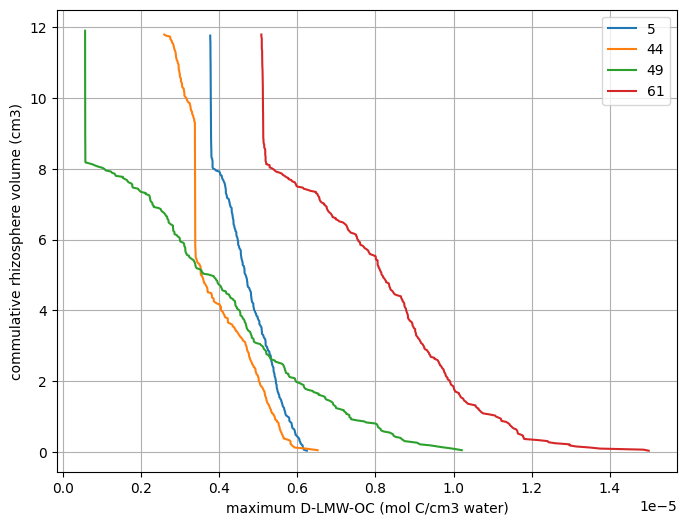

In [11]:
cumsum_and_plot(dfmean, 'cs', 'vols',ylab='commulative rhizosphere volume (cm3)', 
                xlab='maximum D-LMW-OC (mol C/cm3 water)',doLog=False, ascending=False)

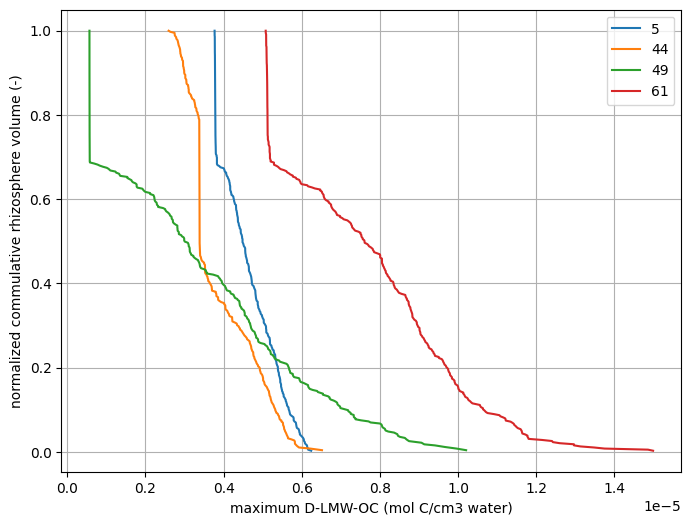

In [12]:
cumsum_and_plot(dfmean, 'cs', 'vols',ylab='normalized commulative rhizosphere volume (-)', 
                xlab='maximum D-LMW-OC (mol C/cm3 water)',doLog=False, dorelative=True,ascending=False)

In [14]:
df0 =dfmean[dfmean['st']==0]